# Particle Swarm Optimization

**Pseudocode and equations are taken from "Learning Algorithms and Neural Networks Volume 1" by Dr. Victor Parque.**

I'm going to implement PSO algorithms in this notebook.

## Particle Swarm (Maximization)

Each particle $X$ has a position vector $x_t$ and a velocity vector $v_t$ at generation $t$. These two vectors are updated at the end of each generation using the following two formula:

$$
x_{t+1} = x_t + v_{t+1}
$$

$$
v_{t+1} = \omega v_t + c_1 r_1(pbest_t - x_t) + c_2 r_2 (gbest_t - x_t)
$$

Algorithm Pseudo Code:

```python
Generate initial population and velocity randomly

Repeat:
    for each particle in population:
        if f(x) > f(pbest):
            pbest = x
    gbest = population[ argmax(f(pbest)) ]
    for each particle in population:
        update velocity and position
Until termination criteria is met
        
```

In [1]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

In [146]:
omega = 0.5
c1 = 0.2
c2 = 1
n = 2
space_lowerbound = [-2, -1]
space_upperbound = [2, 1]

In [147]:
def fitness(x):
    """
    calculates the value of the function to optimize at input x

    Parameters
    ----------
    x : np.ndarray
        MxN matrix where M is any integer number of particles, N is the
        dimension of the particle vector.

    Returns
    -------
    np.ndarray
        Mx1 fitness value of the input particles x.

    """
    return (4 - 2.1*x[:,0]**2+x[:,0]**4/3) * x[:,0]**2 + np.prod(x, axis=1) + \
                    (-4+4*x[:,1]**2)*x[:,1]**2

In [148]:
def f2(x):
    return 10 + \
    np.exp(1) - \
    10*np.exp(-0.2 * np.sqrt(0.5 * (x[:,0]**2 + x[:,1]**2)) - \
    np.exp(0.5*(np.cos(2*np.pi*x[:,0])+np.cos(2*np.pi*x[:,1]))))

In [149]:
# generate initial population and velocity
NP = 50
iterations = 400

pop = np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))
vel = 0.1 * np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))

pbest = pop.copy()
f_pbest = fitness(pbest)
gbest = pop[np.argmin(f_pbest),:]

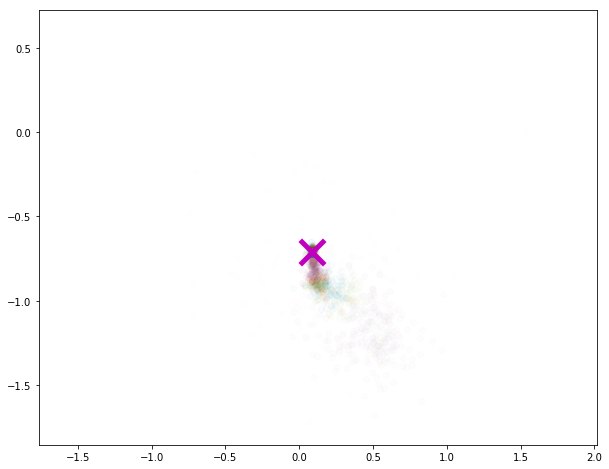

In [150]:
plt.figure(figsize=(10,8))
for _ in range(iterations):
    f_x = fitness(pop)
    updated_particles = f_x < f_pbest
    f_pbest[updated_particles] = f_x[updated_particles]
    pbest[updated_particles] = pop[updated_particles]
    gbest = pop[np.argmin(f_pbest),:]
    
    r1 = np.random.rand(*pop.shape)
    r2 = np.random.rand(*pop.shape)
    
    vel = omega*vel + c1*r1*(pbest - pop) + c2*r2*(gbest - pop)
    pop = pop + vel
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
# plt.scatter(pbest[0:5,:], pbest[0:5,:], c='r', marker='x')
plt.scatter(gbest[0], gbest[1], c='m', marker='x', linewidth=5, s=600)

## Fitness Euclidean Ratio

In Fitness Euclidean Ration PSO (FERPSO), the global best is computed as following:

$$
gbest_i = \underset{x}{\operatorname{argmax}} FER(i, j)
$$

$$
FER(i, j) = \alpha \frac{f(p_j) - f(p_i)}{\lVert p_j - p_i \rVert}
$$

$$
\alpha = \frac{\lVert s \rVert}{f(p_g) - f(p_w)}
$$

$$
\lVert s \rVert = \sqrt{\sum_{d=1}^{D} (U_d - L_d)^2}
$$

The FERPSO algorithm pseudocode:
```python
Generate initial population and velocity

Repeat:
    Update pbest (if f(x) > f(pbest): pbest = x)
    for each particle i in population:
        gbest(i) = Find max FER(i,j) for all particles j
    Update velocity and position
```

In [68]:
def FER(i, pop, f_x):
    from numpy import linalg
    s = np.sqrt(sum([(space_upperbound[i]-space_lowerbound[i])**2 for i in range(n)]))
    alpha = s / (f_pbest.min() - f_pbest.max())
    return pop[np.argmax(alpha * (f_x - fitness(i[None, :])) / linalg.norm(pop - i))]
#     return pop[np.argmax(alpha * (f_x - f2(i[None, :])) / linalg.norm(pop - i))]

In [155]:
# generate initial population and velocity

NP = 50
iterations = 100

omega = 0.1
c1 = 1
c2 = 0.5
n = 2
space_lowerbound = [-2, -1]
space_upperbound = [2, 1]

pop = np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))
vel = 0.1 * np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))

# pbest = pop.copy()
f_pbest = fitness(pbest)
# f_pbest = f2(pbest)
f_x = fitness(pop)
# f_x = f2(pop)
gbest = np.array([FER(i, pop, f_x) for i in pop])

C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


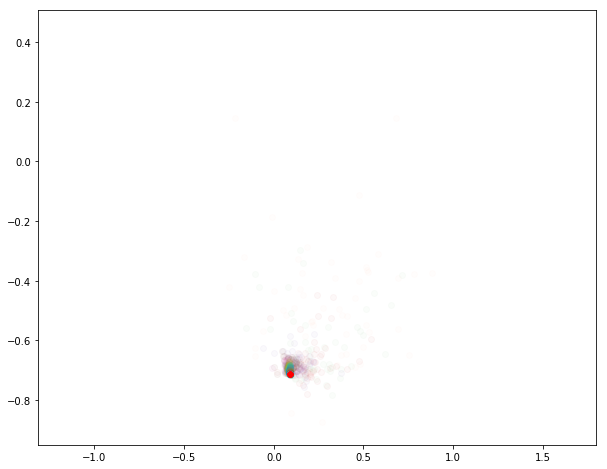

In [156]:
plt.figure(figsize=(10,8))
for _ in range(iterations):
    f_x = fitness(pop)
#     f_x = f2(pop)
    updated_indices = f_x < f_pbest
    f_pbest[updated_indices] = f_x[updated_indices]
    pbest[updated_indices] = pop[updated_indices]
    gbest = np.array([FER(pop[i], np.delete(pop, i, axis=0), np.delete(f_x, i, axis=0)) for i in range(NP)])
    
    r1 = np.random.rand(*pop.shape)
    r2 = np.random.rand(*pop.shape)
    
    vel = omega*vel + c1*r1*(pbest - pop) + c2*r2*(gbest - pop)
    pop = pop + vel
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
plt.scatter(gbest[np.argmin(f_pbest), 0], gbest[np.argmin(f_pbest), 1], c='r')

## PSO with Local Search

In PSO with Local Search, the following is considered

* Each particle re-updates the pbest considering other particles pbests
* The method is a Local-best PSO

Algorithm Pseudocode:

```python
Update pbest (the conventional method)

# Re-Update the pbest
for each particle in population:
    pbest_nearest = Closest pbest in population
    u = pbest_nearest - pbest
    if f(pbest_nearest) > = f(pbest):
        a = 1
    else:
        a = -1
    temp = pbest + c*r*a*u # c and r are the defined constants
    if f(temp) > f(pbest):
        pbest = temp
```

In [46]:
# generate initial population and velocity

NP = 50
iterations = 100

omega = 0.1
c1 = 0.2
c2 = 0.8
n = 2
space_lowerbound = [-5, -5]
space_upperbound = [5, 5]

pop = np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))
vel = 0.1 * np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(NP,n))

pbest = pop.copy()
f_pbest = fitness(pbest)

gbest = pop[np.argmin(f_pbest),:]

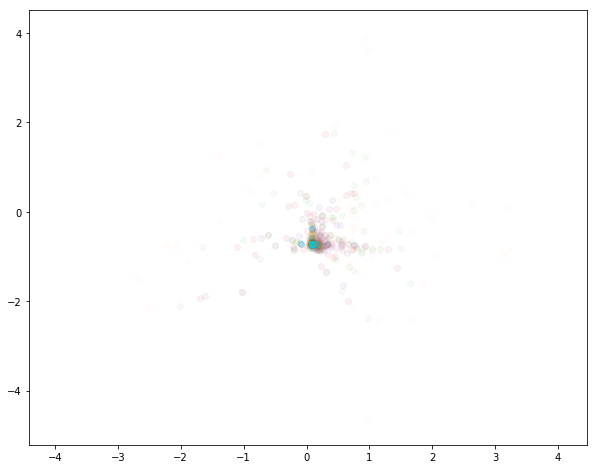

In [47]:
plt.figure(figsize=(10,8))
iters = 50
for _ in range(iters):
    
    
    f_x = fitness(pop)
    updated_indices = f_x < f_pbest
    f_pbest[updated_indices] = f_x[updated_indices]
    pbest[updated_indices] = pop[updated_indices]
    for i, x in enumerate(pop):
        pbest_reminder = np.delete(pbest, i, axis=0)
        pbest_nearest = pbest_reminder[np.argmin(linalg.norm(x - pbest_reminder, axis=1))]
        u = pbest_nearest - pbest[i]
        if fitness(pbest_nearest[None,:]) <= fitness(pbest[None,i]):
            a = 1
        else:
            a = -1
        c = 0.2
        r = np.random.rand()
        temp = pbest[i] + c*r*a*u
        f_pbest[i] = fitness(pbest[None,i])
        if fitness(temp[None,:]) > f_pbest[i]: #fitness(pbest[None,i]):
            pbest[i] = temp
#     pbest = np.clip(pbest, space_lowerbound, space_upperbound)

    r1 = np.random.rand(*pop.shape)
    r2 = np.random.rand(*pop.shape)
    
    gbest = pop[np.argmin(f_pbest)]
    vel = omega*vel + c1*r1*(pbest - pop) + c2*r2*(gbest - pop)
    pop = pop + vel
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iters)
#     plt.plot(f_pbest)

## Speciation in PSO

In Speciation PSO (SPSO) the following is considered:

* Sub-populations (species)
* The fittest particle in the sub-population is the **seed**
* A niche radius is assumed (a parameter)
* Updated of velocity and position occurs within each sub-population

Algorithm pseudocode:

```python
Generate initial population and veclocity

Repeat:
    Updated pbest
    Find seeds (this algorithm will be shown next)
    for each specie in population:
        for each particle in specie:
            gbest[i] = seed of specie
            update velocity and position
until termination criteria ends
```

Find seeds algorithm pseudocode:
```python
Seeds = {}
Set L = order population from best to worst
while no more unmarked individuals in L do:
    find the best unmarked x in L
    Mark x
    found = False
    for each y in Seeds:
        if d(x,y) < r:
            found = True
            break
            
    if not found:
        Let Seeds = Seeds union {x}
```

In [50]:
# generate initial population and velocity

pop = np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(100,n))
vel = np.random.uniform(low=space_lowerbound, high=space_upperbound, size=(100,n))
pbest = np.zeros_like(pop)
gbest = np.zeros(pop.shape[0])
f_pbest = np.zeros(pop.shape[0])

In [ ]:
plt.figure(figsize=(10,8))
iters = 1000
for _ in range(iters):
    c = 0.2
    r = np.random.rand()
    R = 1
    
    # update pbest
    f_x = fitness(pop)
    updated_indices = f_x > f_pbest
    f_pbest[updated_indices] = f_x[updated_indices]
    pbest[updated_indices] = pop[updated_indices]
    
    # find seeds
    seeds = {}
    L = pop[np.argsort(f_x),:]
    marks = ones(L.shape[0])
    while np.all(marks):
        i = np.nonzero(marks)[0][0]
        marks[i] = 0
        found = False
        for y in seeds:
            if linalg.norm(L[i]-y) < R:
                found = True
                gbest[i] = f_x[i]
                break
        if not found:
            seeds.union(L[i])
    
    
    
    